In [1]:
import matplotlib.pyplot as plot

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers,losses,datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

tf.__version__

'2.1.0'

Label 0


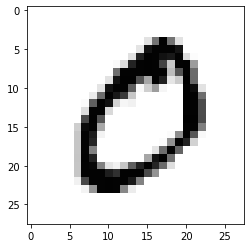

In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

plot.imshow(train_images[1],cmap="Greys")

print("Label",train_labels[1])

In [5]:
shape_size=28*28

train_images=train_images.reshape(-1,shape_size)/255.0
test_images=test_images.reshape(-1,shape_size)/255.0

In [6]:
model = Sequential([
    Dense(shape_size, activation=tf.nn.relu,input_shape=(shape_size,),
          name="Inputs"),
    Dense(shape_size/2,activation=tf.nn.relu,input_shape=(shape_size,),
          name="Hidden1"),
    Dropout(0.2,name="Dropou1"),
    Dense(shape_size/4, activation=tf.nn.relu, input_shape=(shape_size/2,),
          name="Hidden2"),
    Dropout(0.2,name="Dropout2"),
    Dense(10, activation=tf.nn.softmax,name="Output")
])

model.compile(optimizer=optimizers.Adam(),
              loss=losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (Dense)               (None, 784)               615440    
_________________________________________________________________
Hidden1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Dropou1 (Dropout)            (None, 392)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 196)               77028     
_________________________________________________________________
Dropout2 (Dropout)           (None, 196)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1970      
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
______________________________________________

In [8]:
model.fit(train_images, train_labels, 
          epochs = 10,
          validation_data = (test_images,test_labels))

loss, acc = model.evaluate(test_images, test_labels)

print("Trained model, accuracy: {:5.2f}".format(100*acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0406 - accuracy: 0.9883 - val_loss: 0.0850 - val_accuracy: 0.9814
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0785 - val_accuracy: 0.9802
Epoch 3/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.1128 - val_accuracy: 0.9747
Epoch 4/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.0881 - val_accuracy: 0.9805
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.0821 - val_accuracy: 0.9841
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.0782 - val_accuracy: 0.9835
Epoch 7/10
60000/60000 [==========================

In [9]:
model.save('modelim.h5')